# 計程車小費資料集EDA

## 1. 載入相關套件

In [50]:
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
import numpy as np

## 載入資料集

In [51]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 2. 資料清理、資料探索與分析

<AxesSubplot:xlabel='tip', ylabel='Count'>

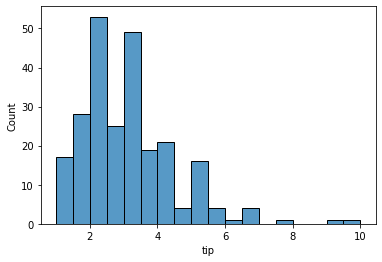

In [52]:
# 對小費繪製直方圖
sns.histplot(x='tip', data=df)

<AxesSubplot:xlabel='log_tip', ylabel='Density'>

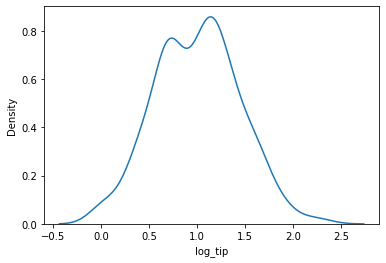

In [53]:
df['log_tip'] = np.log(df['tip'])
sns.kdeplot(x='log_tip', data=df)

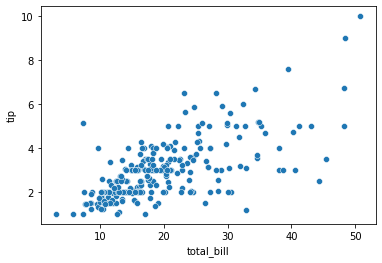

In [54]:
# 散佈圖
sns.scatterplot(x="total_bill", y="tip", data=df);

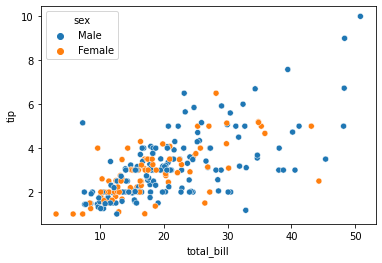

In [55]:
# 三維散佈圖
sns.scatterplot(x="total_bill", y="tip", hue='sex', data=df);

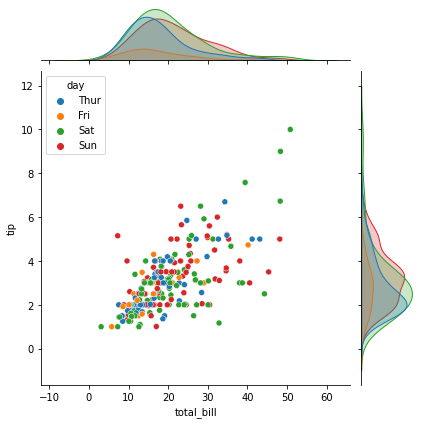

In [56]:
# joint plot
sns.jointplot(data=df, x="total_bill", y="tip", hue="day")

In [57]:
df.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

## 觀察週間對小費的影響

<AxesSubplot:xlabel='day', ylabel='tip'>

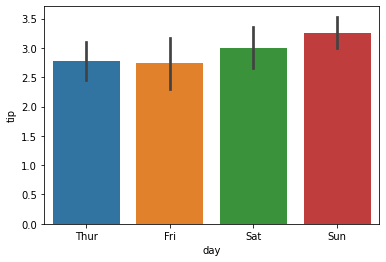

In [58]:
sns.barplot(x='day', y='tip', data=df)

<AxesSubplot:xlabel='day', ylabel='tip'>

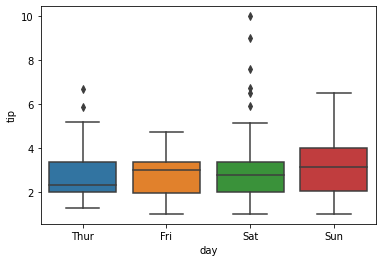

In [59]:
# 箱型圖
sns.boxplot(x='day', y='tip', data=df)

In [60]:
# 類別變數轉換為數值
df.sex = df.sex.map({'Female':0, 'Male':1}).astype(int)
df.smoker = df.smoker.map({'No':0, 'Yes':1}).astype(int)
df.day = df.day.map({'Thur':1, 'Fri':2, 'Sat':3, 'Sun':4}).astype(int)
df.time = df.time.map({'Lunch':0, 'Dinner':1}).astype(int)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int32  
 3   smoker      244 non-null    int32  
 4   day         244 non-null    int32  
 5   time        244 non-null    int32  
 6   size        244 non-null    int64  
 7   log_tip     244 non-null    float64
dtypes: float64(3), int32(4), int64(1)
memory usage: 11.6 KB


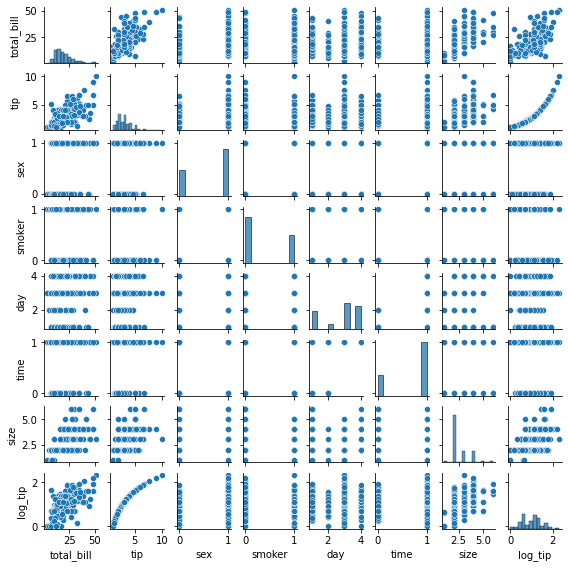

In [62]:
# 繪製pair plot
sns.pairplot(data=df, height=1)

<AxesSubplot:>

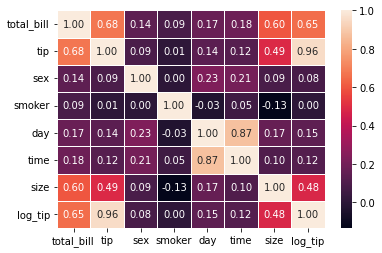

In [63]:
# 熱力圖
sns.heatmap(data=df.corr(), annot=True, fmt=".2f", linewidths=.5)

In [11]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
log_tip       0
dtype: int64

## 3. 不須進行特徵工程

## 4. 資料分割

In [10]:
# 指定X，並轉為 Numpy 陣列
X = df.drop('tip', axis=1).values
y = df.tip.values

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((195, 7), (49, 7), (195,), (49,))

## 特徵縮放

In [12]:
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 5. 選擇演算法

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

## 6. 模型訓練

In [14]:
lr.fit(X_train_std, y_train)

LinearRegression()

## 7. 模型計分

In [15]:
y_pred = lr.predict(X_test_std)

# 計算 r2、MSE
print(f'R2:{r2_score(y_test, y_pred):.2f}, MSE:{mean_squared_error(y_test, y_pred):.2f}') 

R2:0.91, MSE:0.26


## 8. 模型評估，暫不進行

## 9. 模型佈署，暫不進行